# Build basic 2-Layer MLP to solve the xor-Problem

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [61]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [62]:
#make blobs into binary problem
y[y==2]=0
y[y==3]=1

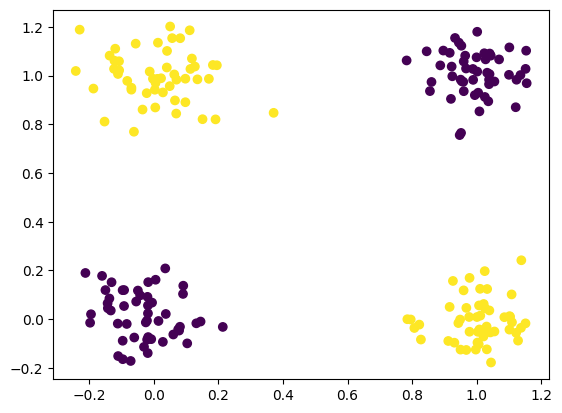

In [63]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [64]:
from sklearn.model_selection import train_test_split
import torch
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


x_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)
Y_train = torch.FloatTensor(y_train)
Y_test = torch.FloatTensor(y_test)

In [65]:

class Model(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self, dims): #define layer types
        super(Model, self).__init__()
        self.yes = torch.nn.Sequential(
            torch.nn.Linear(2,dims, bias=False),
            torch.nn.Sigmoid(),
            torch.nn.Linear(dims,1, bias=False),
            torch.nn.Sigmoid()
        )
        #self.fc = torch.nn.Linear(2,1,bias=False) # Perceptron is single neuron "fully connected" (fc) -> linear unit with 2 inputs and 1 output
        #self.non_linear = torch.nn.Sigmoid() #non-linear activation
    def forward(self, x): #build network
        output = self.yes(x) #w*X
        #output = self.fc(output) # activation
        return output

In [66]:
model1 = Model(5)
criterion1 = torch.nn.BCELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr = 0.01)

In [67]:
model1.eval() #set to eval mode
model1(x_test)

tensor([[0.5568],
        [0.5361],
        [0.5568],
        [0.5502],
        [0.5492],
        [0.5360],
        [0.5436],
        [0.5578],
        [0.5510],
        [0.5438],
        [0.5472],
        [0.5565],
        [0.5463],
        [0.5550],
        [0.5453],
        [0.5437],
        [0.5551],
        [0.5350],
        [0.5488],
        [0.5580],
        [0.5389],
        [0.5470],
        [0.5580],
        [0.5462],
        [0.5372],
        [0.5575],
        [0.5569],
        [0.5590],
        [0.5581],
        [0.5371],
        [0.5441],
        [0.5496],
        [0.5573],
        [0.5495],
        [0.5381],
        [0.5400],
        [0.5589],
        [0.5453],
        [0.5437],
        [0.5472],
        [0.5365],
        [0.5418],
        [0.5459],
        [0.5480],
        [0.5378],
        [0.5501],
        [0.5469],
        [0.5590],
        [0.5488],
        [0.5471],
        [0.5373],
        [0.5369],
        [0.5487],
        [0.5375],
        [0.5421],
        [0

In [68]:
model1.train() #set to train mode
epoch = 90000
for epoch in range(epoch):
    optimizer1.zero_grad()
    # Forward pass
    y_pred = model1(x_train)
    # Compute Loss
    loss = criterion1(y_pred.squeeze(), Y_train)

    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    #make gradient update
    optimizer1.step()

Streaming output truncated to the last 5000 lines.
Epoch 85000: train loss: 0.06894513219594955
Epoch 85001: train loss: 0.06894288957118988
Epoch 85002: train loss: 0.0689406767487526
Epoch 85003: train loss: 0.06893844157457352
Epoch 85004: train loss: 0.06893621385097504
Epoch 85005: train loss: 0.06893400102853775
Epoch 85006: train loss: 0.06893177330493927
Epoch 85007: train loss: 0.06892955303192139
Epoch 85008: train loss: 0.0689273253083229
Epoch 85009: train loss: 0.06892510503530502
Epoch 85010: train loss: 0.06892287731170654
Epoch 85011: train loss: 0.06892064958810806
Epoch 85012: train loss: 0.06891842186450958
Epoch 85013: train loss: 0.0689162015914917
Epoch 85014: train loss: 0.06891398131847382
Epoch 85015: train loss: 0.06891175359487534
Epoch 85016: train loss: 0.06890954077243805
Epoch 85017: train loss: 0.06890730559825897
Epoch 85018: train loss: 0.06890508532524109
Epoch 85019: train loss: 0.0689028725028038
Epoch 85020: train loss: 0.06890063732862473
Epoch 85

In [70]:
model1.eval() #set model to eval mode

#train
y_pred1 = model1(x_train) #predict
y_pred1=(y_pred1>0.5).int().flatten() #argmax class lable
train_acc =torch.sum(y_pred1 == Y_train.int())/ Y_train.shape[0]
print("train ACC: ",train_acc.float())

train ACC:  tensor(1.)


In [71]:
#test
y_pred = model1(x_test) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = torch.sum(y_pred == Y_test.int()) / Y_test.shape[0]
print("test ACC: ",test_acc.float())

test ACC:  tensor(1.)


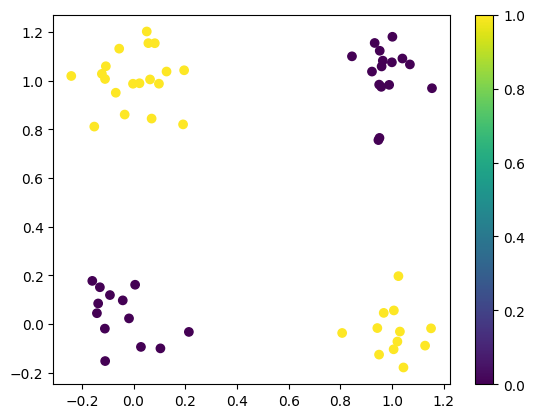

In [72]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.colorbar()